In [1]:
import pandas as pd
import geopandas as gp
import warnings
warnings.filterwarnings('ignore')
import gc
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 或者SimHei

In [2]:
# calendar 数据为短租房源时间表信息，包括房源、时间、是否可租、租金和可租天数等等。
calendar = pd.read_csv('raw/calendar_detail.csv')

# listing  数据为短租房源基础信息，包括房源、房东、位置、类型、价格、评论数量和可租时间等等。明细版中包含更多房源相关细节。
listing_details = pd.read_csv('raw/listings_detail.csv')
listing = pd.read_csv('raw/listings.csv')

# neighbourhoods 数据为北京的行政区划。
neighbourhoods = pd.read_csv('raw/neighbourhoods.csv')

# reviews 数据为短租房源的评论信息。汇总版中仅包括房源 listing_id和评论日期，用来时间序列和数据可视化分析。
# 明细版还包括评论相关的内容和作者信息。
review = pd.read_csv('raw/reviews.csv')
review_detail = pd.read_csv('raw/reviews_detail.csv')



In [25]:
pd.DataFrame(list(review_detail.columns),
['房源id','评论id','评论日期','评论者id','评论者名字','评论内容'])

,0
房源id,listing_id
评论id,id
评论日期,date
评论者id,reviewer_id
评论者名字,reviewer_name
评论内容,comments


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44054,Modern and Comfortable Living in CBD,192875,East Apartments,NaN,朝阳区 / Chaoyang,39.89503,116.45163,Entire home/apt,792,1,89,2019-03-04,0.85,9,341
1,100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,NaN,密云县 / Miyun,40.68434,117.17231,Private room,1201,1,2,2017-10-08,0.10,4,0
2,128496,Heart of Beijing: House with View 2,467520,Cindy,NaN,东城区,39.93213,116.42200,Entire home/apt,389,3,259,2019-02-05,2.70,1,93
3,161902,cozy studio in center of Beijing,707535,Robert,NaN,东城区,39.93357,116.43577,Entire home/apt,376,1,26,2016-12-03,0.28,5,290
4,162144,"nice studio near subway, sleep 4",707535,Robert,NaN,朝阳区 / Chaoyang,39.93668,116.43798,Entire home/apt,537,1,37,2018-08-01,0.40,5,352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28447,33948728,"望京西门子,798,央美附近 温馨如家大床民宿",256112655,旭,NaN,朝阳区 / Chaoyang,39.98671,116.47394,Entire home/apt,396,1,0,NaN,NaN,1,89
28448,33948787,04简约舒适电梯房/工体/三里屯/东大桥/朝阳医院/世贸天阶/国贸,147335664,Pony,NaN,朝阳区 / Chaoyang,39.92560,116.44735,Entire home/apt,1302,3,0,NaN,NaN,6,4
28449,33950006,临近地铁温馨网红风小屋一居室,141786513,昊,NaN,朝阳区 / Chaoyang,39.89733,116.50473,Entire home/apt,329,1,0,NaN,NaN,1,363
28450,33950535,"3. 老国展,三元桥地铁,静安东里大床房",213500128,晓征,NaN,朝阳区 / Chaoyang,39.95988,116.45187,Private room,188,1,0,NaN,NaN,6,84


In [16]:
pd.DataFrame([list(calendar.columns),
['房源id','日期','是否可租','价格','打折价格','最少出租天数','最多出租天数']]).T

,0,1
0,listing_id,房源id
1,date,日期
2,available,是否可租
3,price,价格
4,adjusted_price,打折价格
5,minimum_nights,最少出租天数
6,maximum_nights,最多出租天数


In [162]:
list(listing_details.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [132]:
geo = gp.read_file('raw/neighbourhoods.geojson')

In [133]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384980 entries, 0 to 10384979
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    float64
maximum_nights    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 554.6+ MB


In [134]:
# 去$符号 将钱转为float
calendar['price'] = calendar['price'].str.replace(r'\$|,','',regex=True).astype('float')
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace(r'\$|,','',regex=True).astype('float')
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1165040,2019-04-17,f,511.0,511.0,1.0,1125.0
1,1165040,2019-04-18,t,511.0,511.0,1.0,1125.0
2,1165040,2019-04-19,t,511.0,511.0,1.0,1125.0
3,1165040,2019-04-20,t,511.0,511.0,1.0,1125.0
4,1165040,2019-04-21,t,511.0,511.0,1.0,1125.0


In [135]:
# 只有minimun_nights 和 maximun_nights 有缺失，
# 缺失值均为 available == True
calendar.isnull().sum()
calendar[calendar.isnull().T.any()]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1705372,20060641,2019-04-17,t,678.0,678.0,NaN,NaN
1705496,20060641,2019-04-18,t,678.0,678.0,NaN,NaN
1705497,20060641,2019-04-19,t,678.0,678.0,NaN,NaN
1705498,20060641,2019-04-20,t,678.0,678.0,NaN,NaN
1705499,20060641,2019-04-21,t,678.0,678.0,NaN,NaN
...,...,...,...,...,...,...,...
2094208,21134835,2020-04-11,t,573.0,573.0,NaN,NaN
2094209,21134835,2020-04-12,t,471.0,471.0,NaN,NaN
2094210,21134835,2020-04-13,t,471.0,471.0,NaN,NaN
2094211,21134835,2020-04-14,t,471.0,471.0,NaN,NaN


In [136]:
calendar[calendar.isnull().T.any()]['available'].unique()

array(['t'], dtype=object)

In [137]:

calendar.describe()

,listing_id,price,adjusted_price,minimum_nights,maximum_nights
count,1.038498e+07,1.038498e+07,1.038498e+07,1.038462e+07,1.038462e+07
mean,2.628583e+07,6.643488e+02,6.637883e+02,2.728788e+00,3.611298e+04
std,6.403200e+06,1.967888e+03,1.967274e+03,1.754409e+01,5.928479e+06
min,4.405400e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.245616e+07,2.550000e+02,2.550000e+02,1.000000e+00,1.125000e+03
50%,2.787765e+07,3.990000e+02,3.990000e+02,1.000000e+00,1.125000e+03
75%,3.134482e+07,6.080000e+02,6.080000e+02,1.000000e+00,1.125000e+03
max,3.395441e+07,9.000000e+04,9.000000e+04,1.125000e+03,1.000000e+09


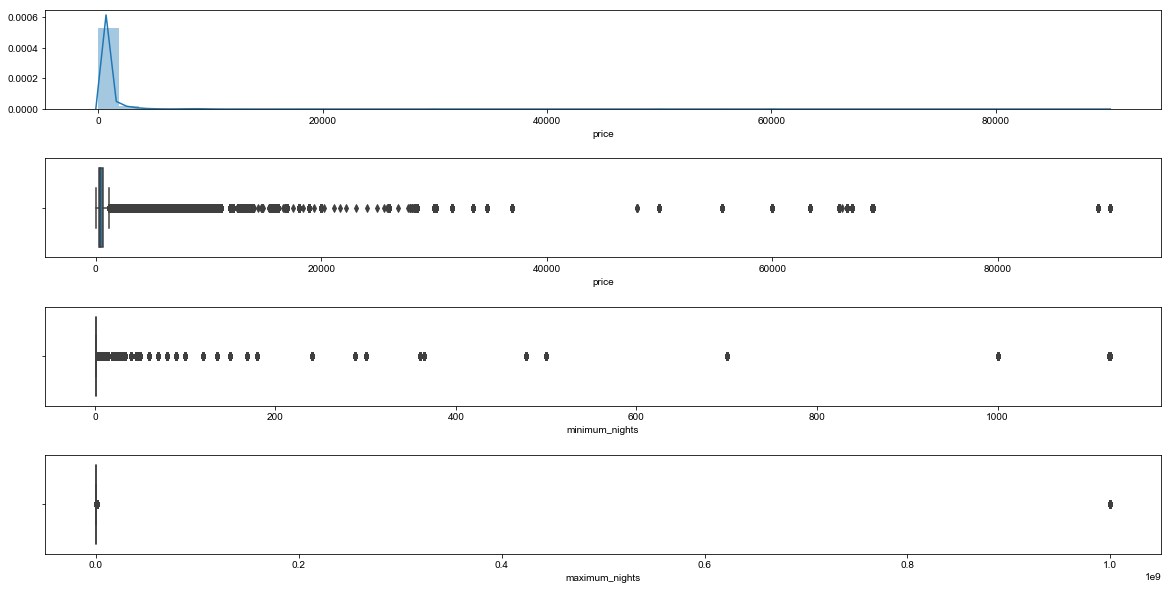

In [138]:
# 价格分布图，可以看出部分价格过高
fig, axes = plt.subplots(4,1,figsize=(20,10))
plt.subplots_adjust(hspace=0.5)
sns.distplot(calendar['price'],ax = axes[0])
sns.boxplot(calendar['price'],ax=axes[1])
sns.boxplot(calendar['minimum_nights'],ax=axes[2])
sns.boxplot(calendar['maximum_nights'],ax=axes[3])
# 先处理其他

In [139]:
# listing.shape (28452, 16)

listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44054,Modern and Comfortable Living in CBD,192875,East Apartments,NaN,朝阳区 / Chaoyang,39.89503,116.45163,Entire home/apt,792,1,89,2019-03-04,0.85,9,341
1,100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,NaN,密云县 / Miyun,40.68434,117.17231,Private room,1201,1,2,2017-10-08,0.10,4,0
2,128496,Heart of Beijing: House with View 2,467520,Cindy,NaN,东城区,39.93213,116.42200,Entire home/apt,389,3,259,2019-02-05,2.70,1,93
3,161902,cozy studio in center of Beijing,707535,Robert,NaN,东城区,39.93357,116.43577,Entire home/apt,376,1,26,2016-12-03,0.28,5,290
4,162144,"nice studio near subway, sleep 4",707535,Robert,NaN,朝阳区 / Chaoyang,39.93668,116.43798,Entire home/apt,537,1,37,2018-08-01,0.40,5,352


In [140]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28452 entries, 0 to 28451
Data columns (total 16 columns):
id                                28452 non-null int64
name                              28451 non-null object
host_id                           28452 non-null int64
host_name                         28452 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     28452 non-null object
latitude                          28452 non-null float64
longitude                         28452 non-null float64
room_type                         28452 non-null object
price                             28452 non-null int64
minimum_nights                    28452 non-null int64
number_of_reviews                 28452 non-null int64
last_review                       17294 non-null object
reviews_per_month                 17294 non-null float64
calculated_host_listings_count    28452 non-null int64
availability_365                  28452 non-null int64
dt

In [141]:
# neighbourhood_group为0, 舍去
listing.drop(columns='neighbourhood_group',inplace=True)
listing.isnull().sum()

id                                    0
name                                  1
host_id                               0
host_name                             0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       11158
reviews_per_month                 11158
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [142]:
# 用unique发现只有number_of_reviews 为0时，才有缺失值，正常
# listing[listing.isnull().T.any()]
listing[listing['name'].isnull()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
456,7775603,NaN,14820763,张三,房山区,39.79932,116.21361,Shared room,9998,1,0,NaN,NaN,1,364


In [143]:
listing['minimum_nights'].unique()
listing['availability_365'].unique()
listing[listing['availability_365'] == 0].head()
# 这部分房源应该已经关闭了

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,密云县 / Miyun,40.68434,117.17231,Private room,1201,1,2,2017-10-08,0.10,4,0
8,287511,High-flr studio in downtown Beijing,1456491,Vera,朝阳区 / Chaoyang,39.94032,116.44227,Entire home/apt,416,1,37,2017-11-05,0.43,9,0
14,456641,High-floor downtown studio #3,1456491,Vera,朝阳区 / Chaoyang,39.93848,116.44248,Entire home/apt,436,1,8,2015-05-25,0.10,9,0
17,498126,High-floor downtown studio #4,1456491,Vera,朝阳区 / Chaoyang,39.94059,116.44175,Entire home/apt,416,2,15,2015-08-01,0.18,9,0
28,873692,The Great Wall Box House Twin Room 长城脚下双人庭院房,527062,Joe,密云县 / Miyun,40.68602,117.17304,Private room,678,1,4,2017-11-05,0.16,4,0


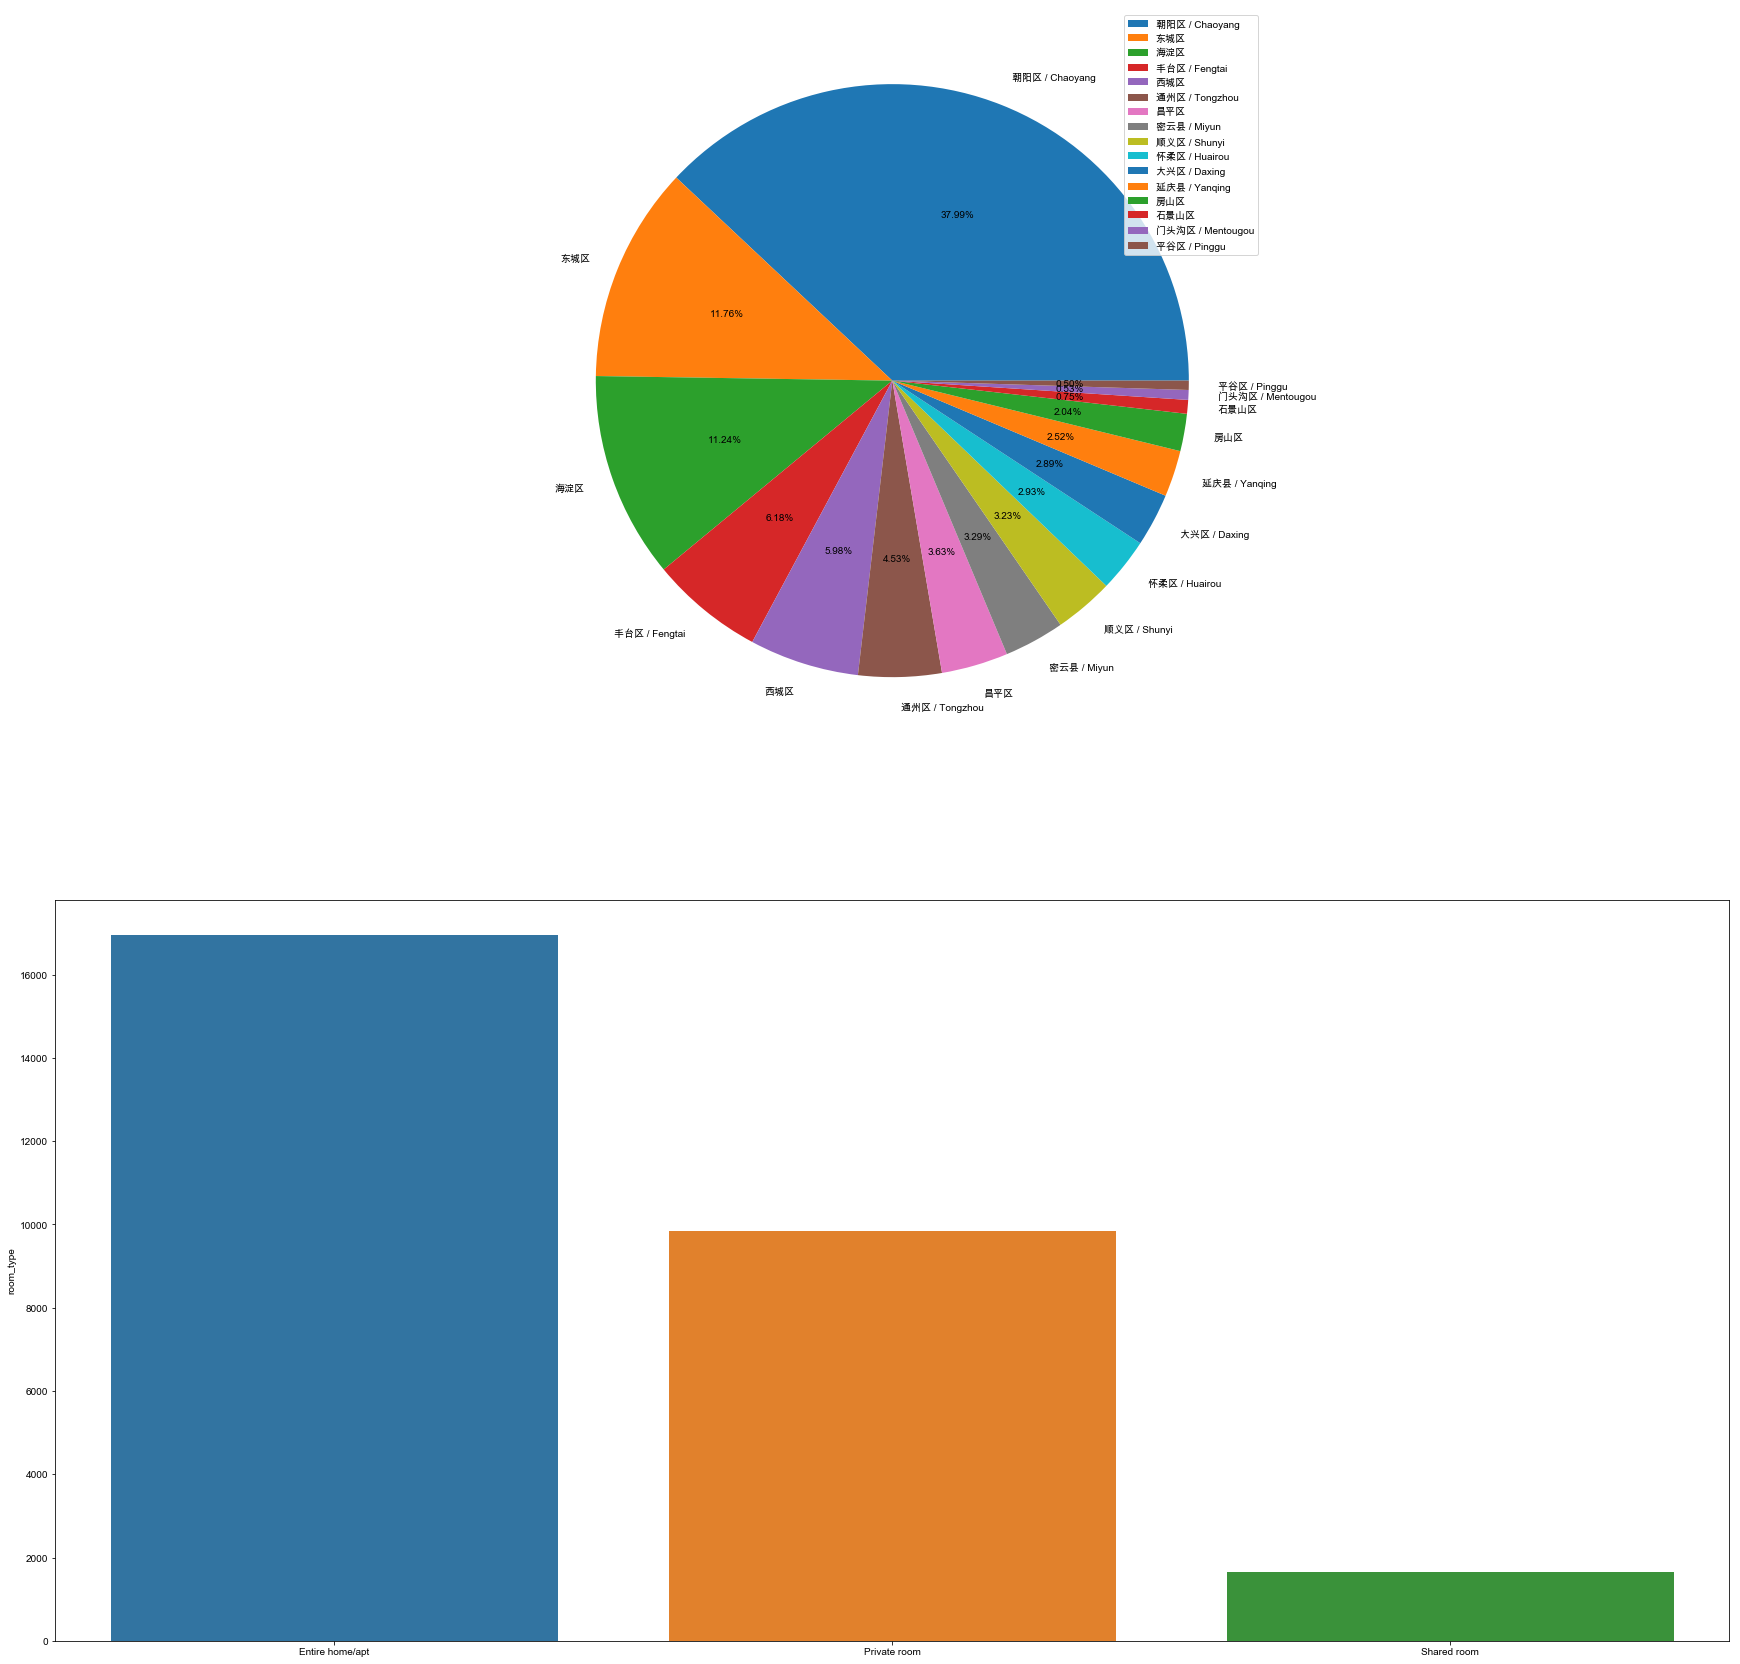

In [144]:

fig,axes = plt.subplots(2,1,figsize=(30,30))
plt.subplots_adjust(wspace=0.5)
# sns.countplot(listing['neighbourhood'],ax=axes[0])

axes[0].pie(listing['neighbourhood'].value_counts(),labels=listing['neighbourhood'].value_counts().index,autopct='%.2f%%')

sns.barplot(x=listing['room_type'].value_counts().index,y=listing['room_type'].value_counts(),ax=axes[1],label=list(listing['room_type'].value_counts().index))
# axes[3].pie(listing['room_type'].value_counts(),labels=listing['room_type'].value_counts().index,autopct='%.2f%%')
axes[0].legend(loc='best')
plt.show()



In [145]:
a = listing['name'].dropna()
listing.loc[a[a.str.contains('不租'or'扰')].index,:]


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1530,14305353,不租了 勿扰,87392907,旭,昌平区,40.08623,116.39910,Entire home/apt,121,1,3,2017-06-27,0.1,1,364
14578,28058584,不租了,211967524,Edison,海淀区,40.01527,116.34137,Shared room,121,1,0,NaN,NaN,1,365


In [146]:
listing_details.shape

(28452, 106)

In [147]:
listing_details.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44054,https://www.airbnb.com/rooms/44054,20190417125910,2019-04-17,Modern and Comfortable Living in CBD,East Apartments offers comfortable living away...,East Apartments is a western managed serviced ...,East Apartments offers comfortable living away...,none,The neighborhood is a private compound. Just ...,...,t,f,strict_14_with_grace_period,f,f,9,7,2,0,0.85
1,100213,https://www.airbnb.com/rooms/100213,20190417125910,2019-04-17,The Great Wall Box Deluxe Suite A团园长城小院东院套房,This is your guide to live by the Great Wall! ...,This is your guide to live by the Great Wall! ...,This is your guide to live by the Great Wall! ...,none,"5 mins walk to Panglongshan Great Wall, 25 min...",...,t,f,strict_14_with_grace_period,f,f,4,0,3,1,0.10
2,128496,https://www.airbnb.com/rooms/128496,20190417125910,2019-04-17,Heart of Beijing: House with View 2,NaN,"确定一下我家真的适合你们｡非常简单的装修,非现代不豪华｡没有电视有线,因为我们不看国内电视节...","确定一下我家真的适合你们｡非常简单的装修,非现代不豪华｡没有电视有线,因为我们不看国内电视节...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,2.70
3,161902,https://www.airbnb.com/rooms/161902,20190417125910,2019-04-17,cozy studio in center of Beijing,NaN,Forget about hotels that charge USD 200 or mor...,Forget about hotels that charge USD 200 or mor...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,5,5,0,0,0.28
4,162144,https://www.airbnb.com/rooms/162144,20190417125910,2019-04-17,"nice studio near subway, sleep 4",NaN,Extended stay self-catering studio apartments ...,Extended stay self-catering studio apartments ...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,5,5,0,0,0.40


In [148]:
# 选出有用子集
subset = ['id','summary','space','description',
          'neighborhood_overview','notes','transit',
          'access','interaction','house_rules','host_since',
          'host_about','host_response_time','host_total_listings_count',
         'property_type','accommodates','bathrooms','bedrooms','beds',
         'square_feet','is_business_travel_ready',
         'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
listing_subset = listing_details[subset]


In [149]:
listing_subset.head()


,id,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,...,beds,square_feet,is_business_travel_ready,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,44054,East Apartments offers comfortable living away...,East Apartments is a western managed serviced ...,East Apartments offers comfortable living away...,The neighborhood is a private compound. Just ...,"*For long term reservations (over 90 days), pl...",The easiest method to get around is by taxi or...,*Guests have access to the Fulicheng gardens,NaN,Registration All guests are required to have a...,...,4.0,1464.0,f,91.0,9.0,9.0,10.0,10.0,10.0,9.0
1,100213,This is your guide to live by the Great Wall! ...,This is your guide to live by the Great Wall! ...,This is your guide to live by the Great Wall! ...,"5 mins walk to Panglongshan Great Wall, 25 min...","这里地处山区,森林覆盖率高,几乎没有PM2.5的影响｡但早晚温差大,尤其晚间气温较北京市区低...",We arrange taxi service at a very reasonable p...,NaN,NaN,"1, we have some kittens, thus it may not be su...",...,1.0,NaN,f,100.0,10.0,9.0,10.0,10.0,9.0,9.0
2,128496,NaN,"确定一下我家真的适合你们｡非常简单的装修,非现代不豪华｡没有电视有线,因为我们不看国内电视节...","确定一下我家真的适合你们｡非常简单的装修,非现代不豪华｡没有电视有线,因为我们不看国内电视节...",NaN,NaN,NaN,NaN,NaN,Non-smoking in the rooms. Do remember to turn ...,...,3.0,323.0,f,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,161902,NaN,Forget about hotels that charge USD 200 or mor...,Forget about hotels that charge USD 200 or mor...,NaN,Important tips I have 6 apartments in one buil...,NaN,NaN,NaN,NaN,...,1.0,NaN,f,77.0,8.0,7.0,9.0,9.0,9.0,8.0
4,162144,NaN,Extended stay self-catering studio apartments ...,Extended stay self-catering studio apartments ...,NaN,Important tips I have 6 apartments in one buil...,NaN,NaN,NaN,NaN,...,2.0,0.0,f,87.0,8.0,7.0,9.0,9.0,9.0,9.0


In [150]:
# 融合listing和listing_subset
lists = pd.merge(listing,listing_subset,on='id')


In [151]:
review.head()

,listing_id,date
0,44054,2010-08-25
1,44054,2010-10-13
2,44054,2011-08-11
3,44054,2012-04-12
4,44054,2012-08-30


In [152]:
review_detail.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,44054,84748,2010-08-25,207019,Jarrod,Sev was very helpful. Sev showed us where to ...
1,44054,118384,2010-10-13,218723,Kimberly,We arrived in Beijing very early in the mornin...
2,44054,436978,2011-08-11,609177,Emma,It is a really massive apartment and really co...
3,44054,1118657,2012-04-12,1787536,Andreyna,"Sev was incredibly helpful, showed us around t..."
4,44054,2140650,2012-08-30,1179565,Frances,The appartment was ideal for our party of 6 ad...


In [153]:
reviews = pd.merge(review,review_detail,on=['listing_id','date'])

In [154]:
reviews.head()

,listing_id,date,id,reviewer_id,reviewer_name,comments
0,44054,2010-08-25,84748,207019,Jarrod,Sev was very helpful. Sev showed us where to ...
1,44054,2010-10-13,118384,218723,Kimberly,We arrived in Beijing very early in the mornin...
2,44054,2011-08-11,436978,609177,Emma,It is a really massive apartment and really co...
3,44054,2012-04-12,1118657,1787536,Andreyna,"Sev was incredibly helpful, showed us around t..."
4,44054,2012-08-30,2140650,1179565,Frances,The appartment was ideal for our party of 6 ad...


In [155]:
neighbourhoods

,neighbourhood_group,neighbourhood
0,NaN,东城区
1,NaN,丰台区 / Fengtai
2,NaN,大兴区 / Daxing
3,NaN,密云县 / Miyun
4,NaN,平谷区 / Pinggu
5,NaN,延庆县 / Yanqing
6,NaN,怀柔区 / Huairou
7,NaN,房山区
8,NaN,昌平区
9,NaN,朝阳区 / Chaoyang


In [156]:
calendar.to_pickle('1/calendar.pkl')
lists.to_pickle('1/lists.pkl')
reviews.to_pickle('1/reviews.pkl')
neighbourhoods.to_pickle('1/neigh.pkl')

In [157]:
del calendar,listing,listing_details,review,review_detail,neighbourhoods
gc.collect()

6186